### Defining our business case:

We have received a dataset containing various features of cars and its target as price.

We need to create a predictive model by applying some data science techniques for the price of cars with the available independent variables. 

That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
data=pd.read_csv('auto_imports.csv')
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In the given dataset the data does not contain any headings, as such we have manually listed out the coloumn names and used read_csv method to put these names as headers.

In [3]:
# Manually Listing the column names

columns=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
           "engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size",
           "fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv('auto_imports.csv',names=columns)

In [4]:
# Checking the first 5 rows in our dataframe
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Domain Analysis:

1. symboling: something that represents or stands for something else, usually by convention or association, esp a material object used to represent something abstract.

2. normalized-losses: is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.

3. make: the manufacturer or trade name of a product.

4. fuel-type: Fuel type or “Fuel pathway” means any unique fuel feedstock and production process combination.

5. aspiration: defines those that take in air under normal means at normal atmospheric pressures. its used for boosting engine power.

6. num-of-doors: The number of doors refers to the number of doors on the car body.

7. body-style: Body Style means a level of commonality in vehicle construction as defined by number of doors and roof treatment.

8. drive-wheels: A drive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move.

9. engine-location: Its the space for the engine in the car.

10. wheel-base: the distance between the front and rear axles of a vehicle.

11. length: Vehicle length means the total length of a Vehicle from front to rear, including any external attachments.

12. width: the widest point of the car without the mirrors included.

13. height: means the total height of a Vehicle from the ground to the top of the Vehicle, including any external attachments.

14. curb-weight: Curb weight is the weight of the vehicle including a full tank of fuel and all standard equipment. It does not include the weight of any passengers, cargo, or optional equipment. Curb weight is considered the closest weight to the actual weight of the vehicle.

15. engine-type: There are several types of engines used in automobiles. The car engine types are generally described based on two factors: the fuel type and engine layout/number of cylinders.

16. num-of-cylinders: Generally, the more cylinders your engine has, the more power is produced.

17. engine-size: Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre.

18. fuel-system: Fuel system means all components involved in transporting, metering, and mixing the fuel from the fuel tank to the combustion chamber, including the fuel tank, fuel tank cap, fuel pump, fuel filters, fuel lines, carburetor or fuel-injection components, and all fuel-system vents.

19. bore: An engine's bore is the diameter of each cylinder.

20. stroke: The stroke length is how far the piston travels in the cylinder, which is determined by the cranks on the crankshaft.

21. compression-ratio: A compression ratio is exactly what it sounds like—a ratio where you’re compressing the maximum cylinder volume into the minimum cylinder volume. That’s the volume of the cylinder when a piston is all the way down compared to all the way up to the top. It’s written out and said as a ratio.

22. horsepower: Horsepower refers to the power an engine produces. It's calculated through the power needed to move 550 pounds one foot in one second or by the power needs to move 33,000 pounds one foot in one minute.

23. peak-rpm: RPM stands for revolutions per minute, and it's used as a measure of how fast any machine is operating at a given time.

24. city-mpg: the score a car will get on average in city conditions, with stopping and starting at lower speeds.

25. highway-mpg: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.

26. price: its the value of automobiles.

## Basic Checks:

In [5]:
# To force-view all the columns in our dataframe
pd.set_option('display.max_columns', len(df.columns))

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.shape

(201, 26)

In this dataset we having 201 rows and 26 columns

In [8]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [9]:
# Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Here we observe that there are 15 'Object' type data, 6 'int64' type data and 5 'float' type data.

Upon further inspection we find that there are some columns with continuous data that are provided as 'object' data type.

We found that there 6 columns that has '?' inplace of null values. We need to take care of these null values.

**We have created a for loop that loops through the entire dataset and finds any values matching "?" and then appends that feature into a set**

In [10]:
values_with_ques_mark = set()

for i in df:
    for j in range(len(df)):
        if ((df[i] == '?').values[j]) == True:
            values_with_ques_mark.add(i)
values_with_ques_mark

{'bore',
 'horsepower',
 'normalized-losses',
 'num-of-doors',
 'peak-rpm',
 'stroke'}

Lets find out how many "?" values in the features

In [11]:
for i in values_with_ques_mark :
    print(f"No. of '?' in '{i}' coloumn is {len(df[df[i]=='?'])}")
    

No. of '?' in 'bore' coloumn is 4
No. of '?' in 'num-of-doors' coloumn is 2
No. of '?' in 'peak-rpm' coloumn is 2
No. of '?' in 'normalized-losses' coloumn is 37
No. of '?' in 'stroke' coloumn is 4
No. of '?' in 'horsepower' coloumn is 2


We will replace the "?" values with NaN values signifying that these are null values 

In [12]:
for i in values_with_ques_mark:
    df[i]=df[i].replace('?',np.NaN)

Checking if all the "?" values are sucessfully converted to NaN

In [13]:
for i in values_with_ques_mark:
    print(f"No. of '?' in '{i}' coloumn is {len(df[df[i]=='?'])}")

No. of '?' in 'bore' coloumn is 0
No. of '?' in 'num-of-doors' coloumn is 0
No. of '?' in 'peak-rpm' coloumn is 0
No. of '?' in 'normalized-losses' coloumn is 0
No. of '?' in 'stroke' coloumn is 0
No. of '?' in 'horsepower' coloumn is 0


So here we replace all values of '?' into NaN values

The null/missing values are now visible as we have converted the "?" values to np.Nan. We will take care of these missing values later

In [14]:
# To Show missing values
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We have converted the data to 'float' type from 'object' type as these are numerical data.

In [15]:
for i in values_with_ques_mark:
    if i != 'num-of-doors':
        df[i] = df[i].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


1. The max price of car is 45,400.
2. The minimum price of car is 5,118.
3. Mean Price of car is 13,207.13.

In [19]:
df.describe(include='O')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,199,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


Here we see the top, unique and freq of all the 'Object' type data in our dataset

## Exploratory Data Analysis

### Univariant Analysis

At first we will split our dataset into two with one containing only numerical features and the other containing all the categorical features

In [20]:
catagorical_cols = df.select_dtypes("object")

numercial_cols = df.select_dtypes("number")

Lets visualize our numerical dataset with histogram with kde curve to view the distribution of data of our numerical features 

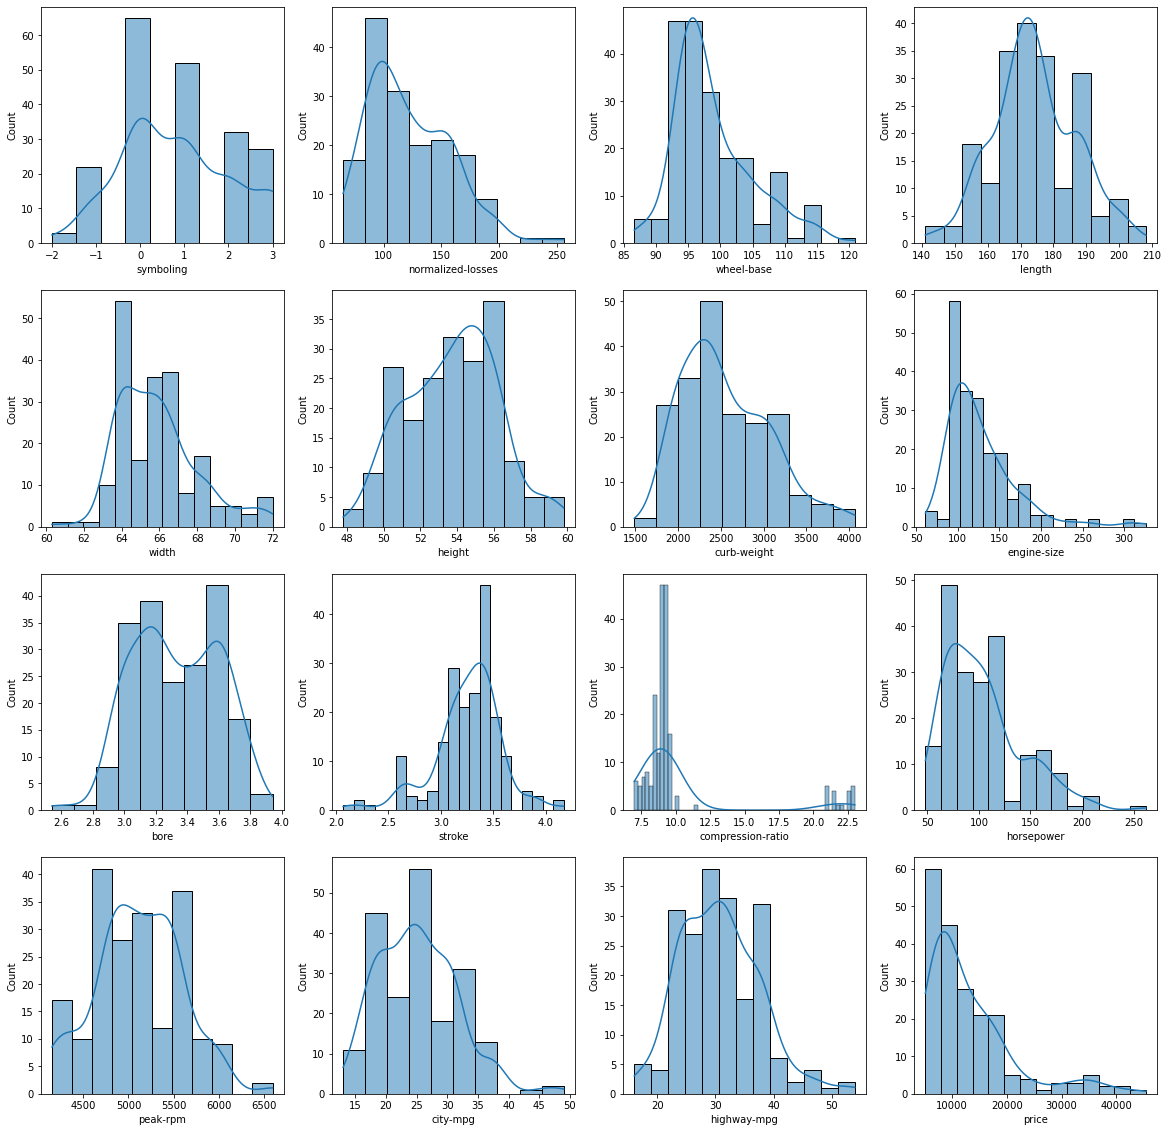

In [21]:
columns = numercial_cols.columns

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(data=numercial_cols, x=col, ax=axs[i],kde =True)

plt.show()

### Our Findings:

Here we find that the data in columns 'normalized-losses','wheel-base','engine-size','compression-ratio', 'horsepower','price' columns are heavily skewed to the right signifying that the mean is greater than the median and mode and there exists some outliers.<br> 
We need to take into account these outliers when we are doing our machine learning training. We should be using tree based algorithms instead of distance based algorithms so that existence of the outliers does not affect our decision making process.

We need to visualize our categorical dataset now. Here we have visualized all the different cars' make and model from our dataset

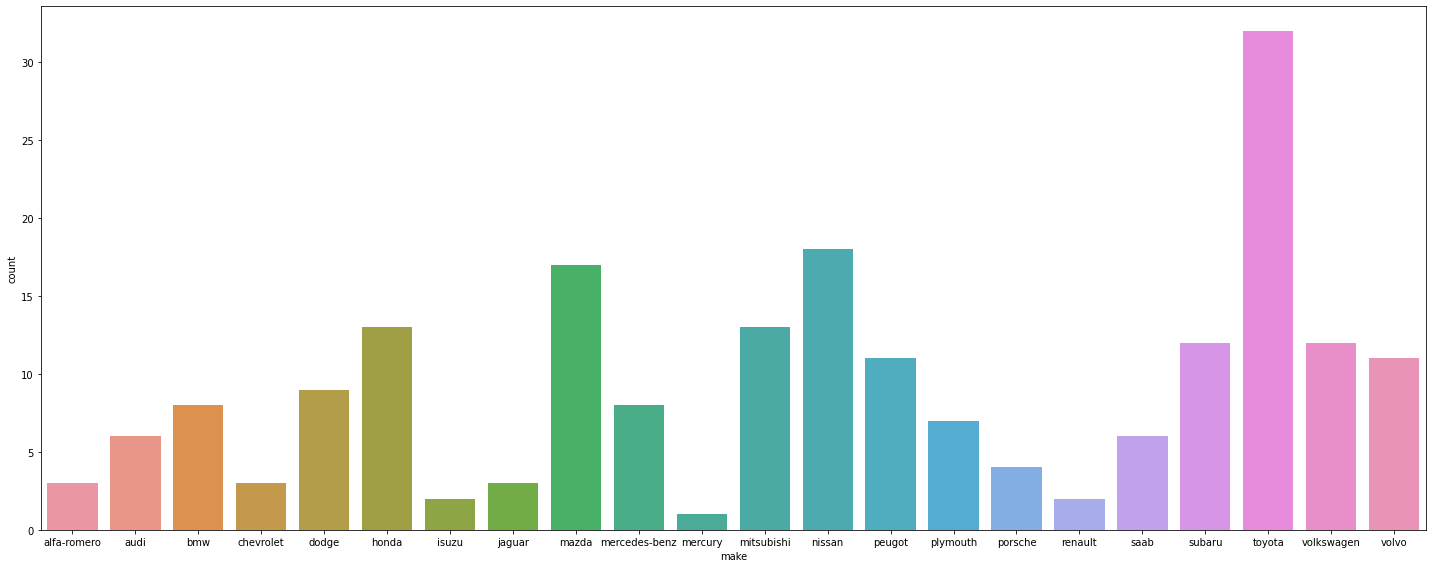

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(data = catagorical_cols,x =catagorical_cols['make'])
plt.tight_layout()

We find that in our dataset 'Toyota' brand of cars were the most imported and 'Mercury' brand were the least imported

In the below visualization we have barplotted our categorical features

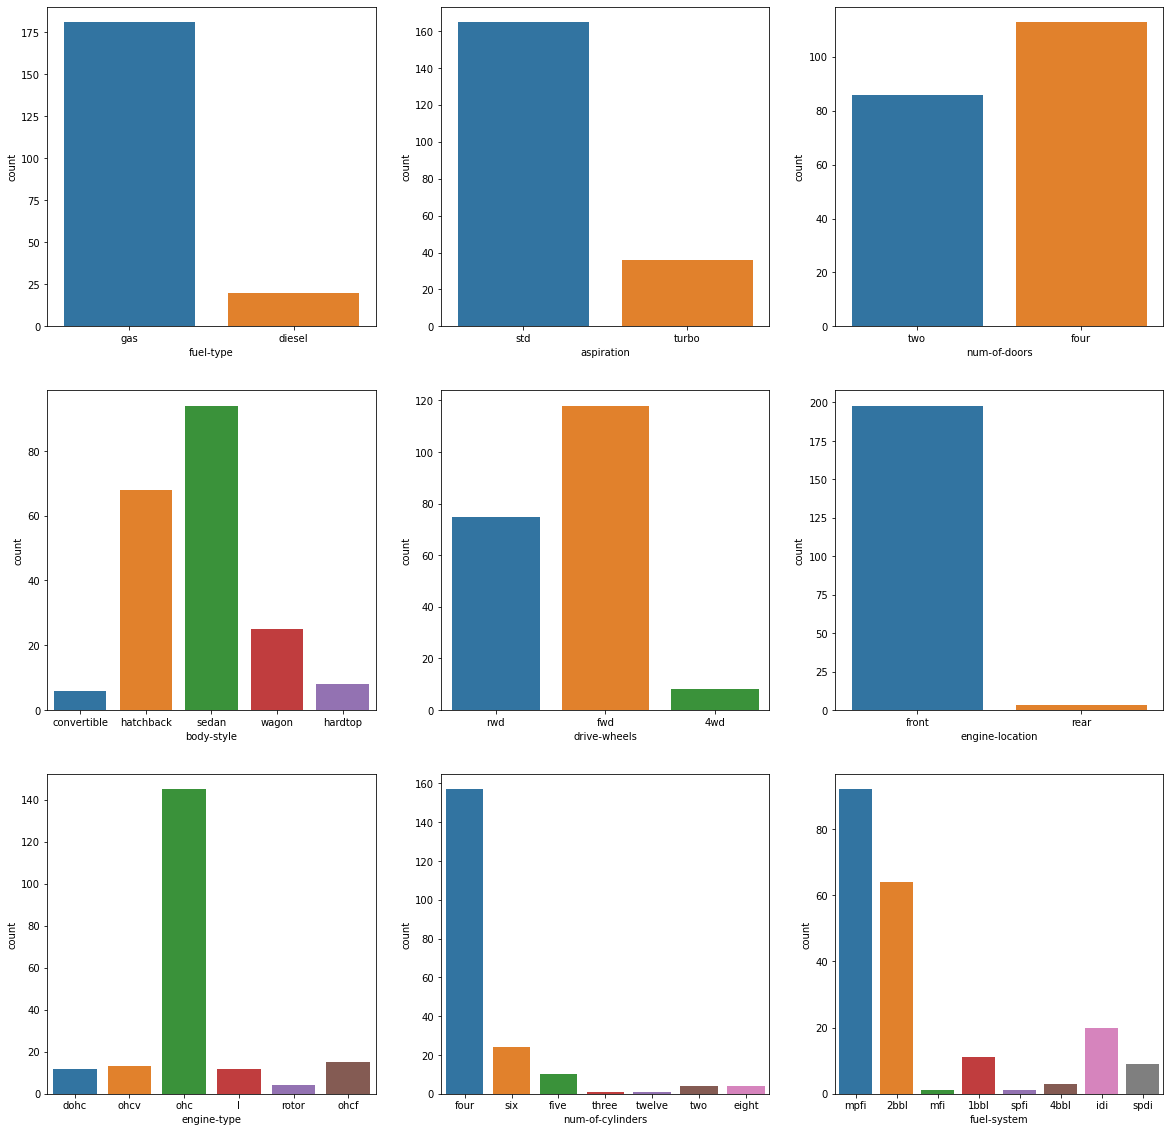

In [23]:
columns = catagorical_cols.columns[1:]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axs[i])

plt.show()

### Our Findings:

**Fuel-Type:** In our dataset, we have observed that 'gas' powered cars are imported more than disel type

**Aspiration:** There are two types of car aspiration in our dataset. One is standard and other is turbo. Here it is observed that standard aspiration type cars are imported more than turbo type aspiration.

**No. of doors:** Out of 'Foor' door cars and 'Two' door cars, four door cars were imported more than two door cars.

**Body-Style:**'Sedan' type cars are being imported more. Also there are 'hatchback', 'wagon', 'hardtop' and'convertible' type cars that are in our dataset.

**Drive-Wheels:** There are three types of drive-wheels type, one is 'fwd' which is the most imported type. Second is 'rwd' and the third is '4wd'

**Engine-Location:** Most of the cars that are in our dataset has engine location in the front and very few cars have engine location in the back

**Engine-Type:** The type of engine in most cars that were imported were of 'ohc' type.

**Num-of-cylinders:** The most number of cylinders for cars in our dataset is four.

**Fuel-System:** 'mpfi' and '2bbl' fuel systems are present in cars that were imported more.

### Bivariate Analysis

#### Bivariate analysis of all the numerical columns with respect to price:

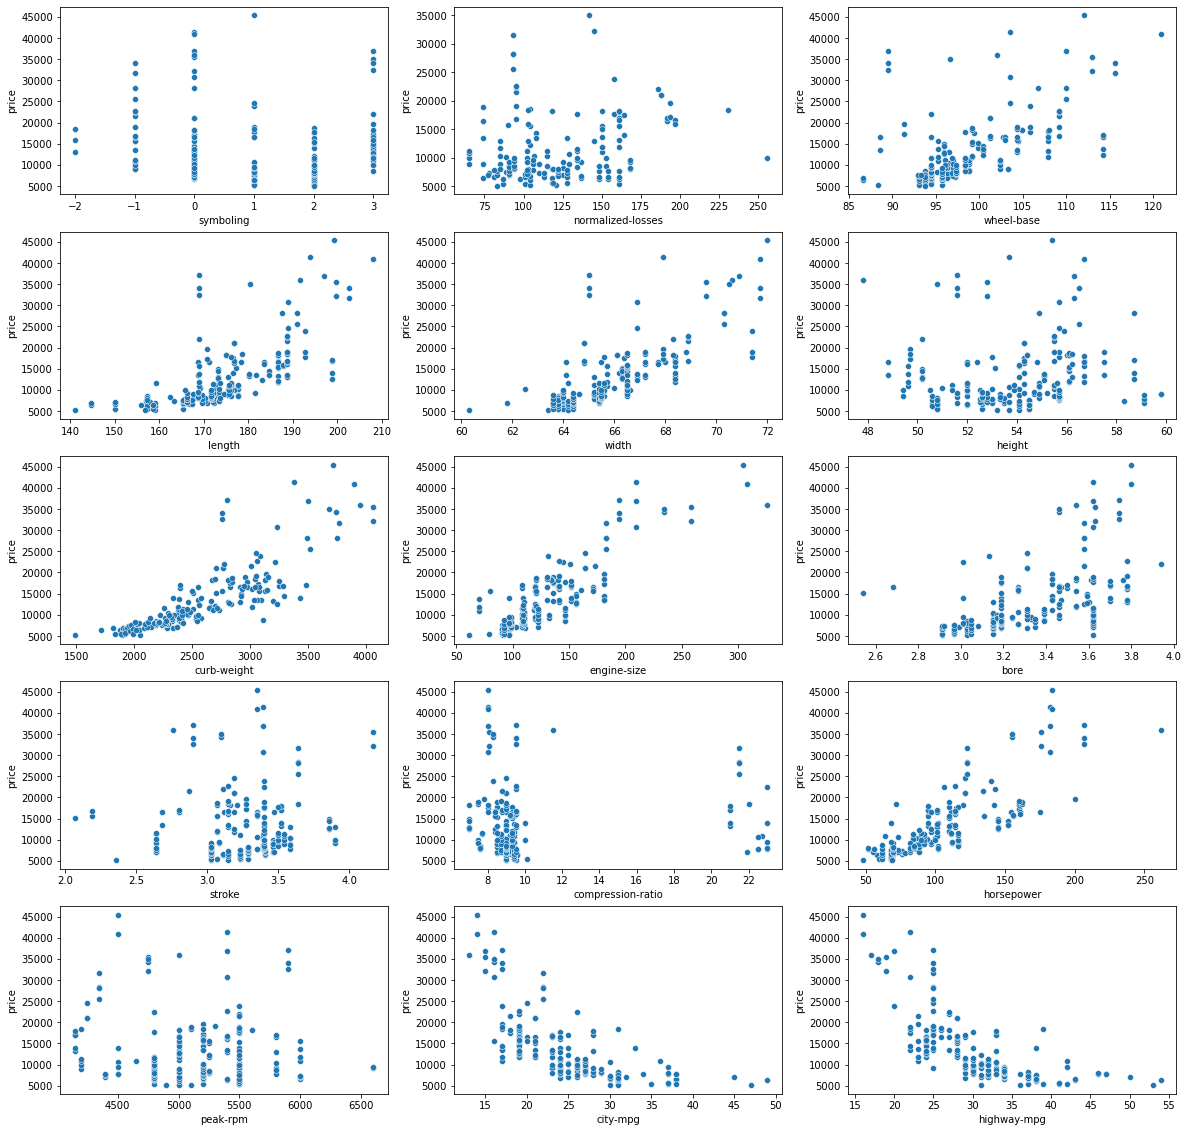

In [24]:
columns = numercial_cols.columns[:-1]

# create a figure with a grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 20))

# flatten the subplots
axs = axs.ravel()

# iterate through the columns
for i, col in enumerate(columns):
    sns.scatterplot(data=numercial_cols, x=col,y = numercial_cols['price'], ax=axs[i])

# show the plot
plt.show()

### Our Findings:

Here we did a bivariate analysis of all numerical features in our dataset with repect to price and here is what we found:
    
1) The feature columns of wheel-base, length, width, curb-weight, engine-size, bore and horsepower are positively correlated to price.

2) The feature columns of city-mpg and highway-mpg are negatively correlated with respect to price

3) The 'symboling' column is showing some sort of ordering in data.

4) Other columns like peak-rpm, compression-ratio, stroke, height, normalized losses is showing no clear correlation to price.

#### Bivariate analysis of all the categorical columns with respect to price:

C:\Users\HP\AppData\Local\Temp/ipykernel_19332/333951655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical_cols['price'] = numercial_cols['price']


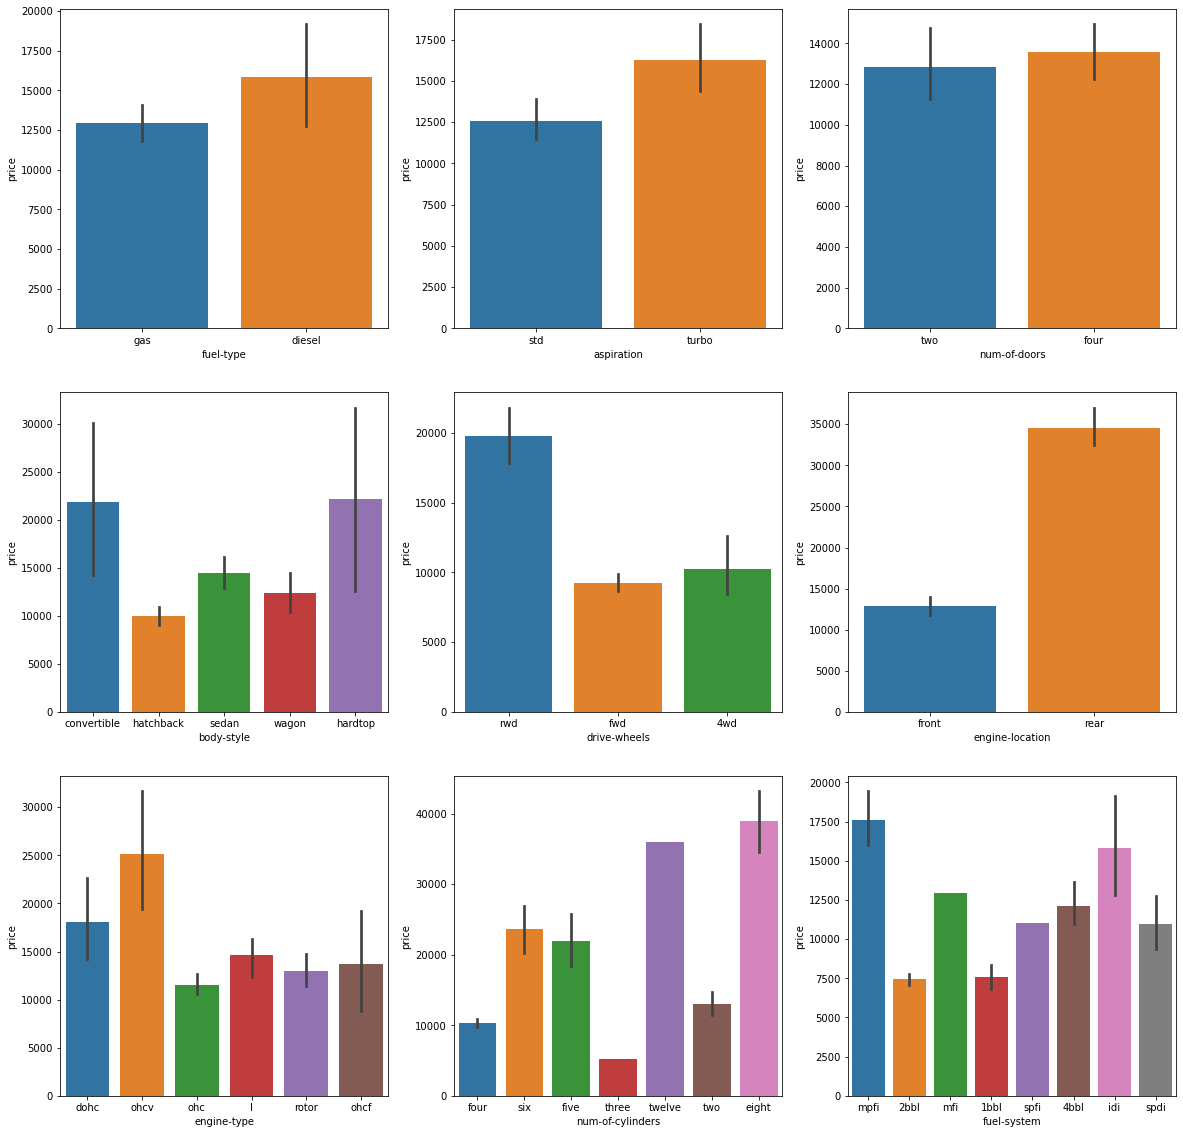

In [25]:
catagorical_cols['price'] = numercial_cols['price']
columns = catagorical_cols.columns[1:-1]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.barplot(data=df, x=col,y=df['price']  ,ax=axs[i])
    
plt.show()

### Our Findings:

1) Cars that run on disel and have aspiration as turbo are being priced more.

2) Cars that have four doors are being sold at higher cost.

3) A covertible car and a hardtop car both are priced above 20,000.

4) A 'rwd' drive-wheel car and cars that have engine on the rear are priced more.

5) Cars with 'ohcv' engine-type, 8 and 12 cylinders and with fuel type of 'mpfi' and 'idi' have the most price.


#### Lets see if the negative correlation between 'city-mpg' and 'highway-mpg' with repect to price can be visualized more clearly

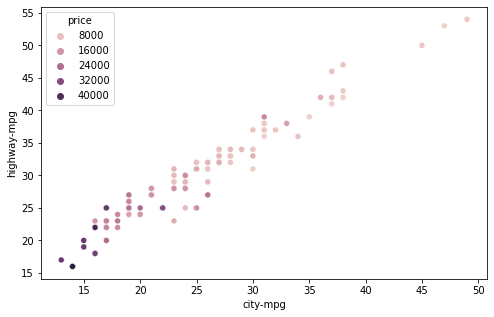

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'city-mpg',y = 'highway-mpg',hue = 'price',data =df)
plt.show()

In the figure above it is shown clearly that both 'city-mpg' and 'highway-mpg' have positive correlation to each other but negative correlation with repect to price

#### Ploting 'length' and 'width' in scatterplot with repect to price

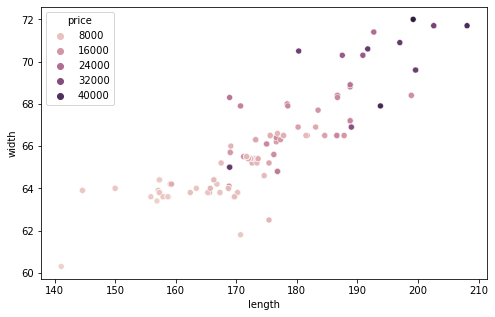

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'length',y = 'width',hue = 'price',data =df)
plt.show()

Ploting 'length' and width with repect to price is showing positive correlation

#### Ploting 'curb-weight' and 'engine-size' in scatterplot with repect to price

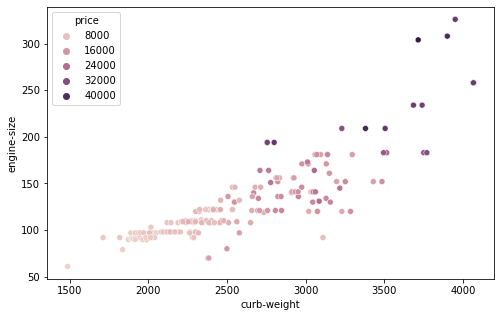

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'curb-weight',y = 'engine-size',hue = 'price',data =df)
plt.show()

Ploting 'curb-weight' and 'engine-size' in scatterplot with repect to price is showing positive correlation

#### Ploting 'wheel-base' and 'length' in scatterplot with repect to price

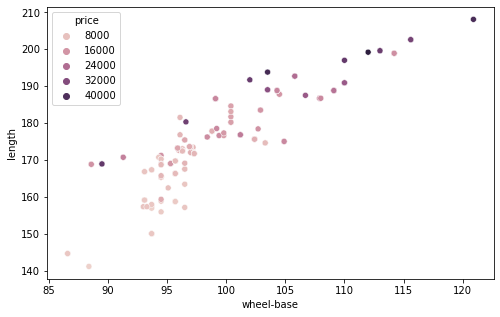

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'wheel-base',y = 'length',hue = 'price',data =df)
plt.show()

Ploting 'wheel-base' and 'length' in scatterplot with repect to price is showing positive correlation

#### Plotting expensive cars and cheap cars in our dataset

At first we will separate our dataset with cars costing more than 35000 and cars costing less than 6000 to observe various features with respect to these prices

In [30]:
df[df['price']>35000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
45,0,NaN,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
46,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400
125,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028


In [31]:
df[df['price']<6000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151
20,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572
31,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.10,60.0,5500.0,38,42,5399
47,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.00,68.0,5000.0,30,31,5195
73,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,2.97,3.23,9.40,68.0,5500.0,37,41,5389
86,1,128.0,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.40,69.0,5200.0,31,37,5499
115,1,119.0,plymouth,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1918,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,37,41,5572
134,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.00,69.0,4900.0,31,36,5118
146,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,3.05,3.03,9.00,62.0,4800.0,35,39,5348


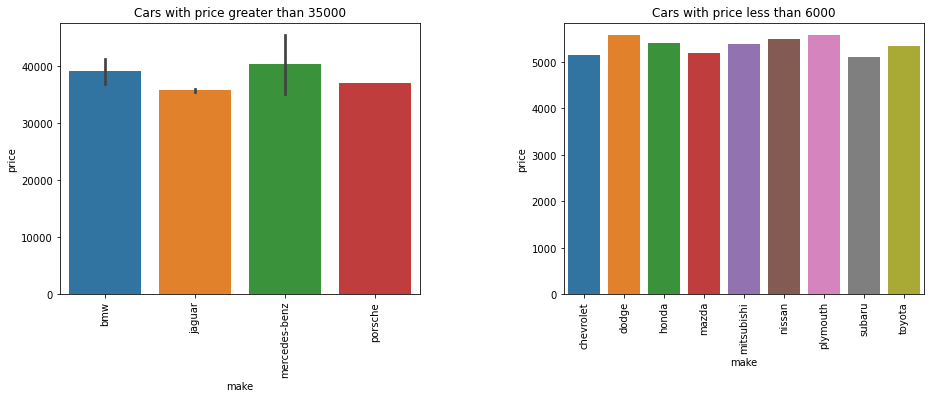

In [32]:
# create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# create the first subplot
sns.barplot(data = df[df['price']>35000], x = df[df['price']>35000]['make'], y =df[df['price']>35000]['price'], ax=ax1)
ax1.set_title("Cars with price greater than 35000")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# create the second subplot
sns.barplot(data = df[df['price']<6000], x = df[df['price']<6000]['make'], y =df[df['price']<6000]['price'], ax=ax2)
ax2.set_title("Cars with price less than 6000")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# Adjust the space between the subplots
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(wspace=0.4, left=0.1, right=1.1)
plt.show()




The cheapest car is 'Subaru' and the most expensive car is the 'mercedes-benz'

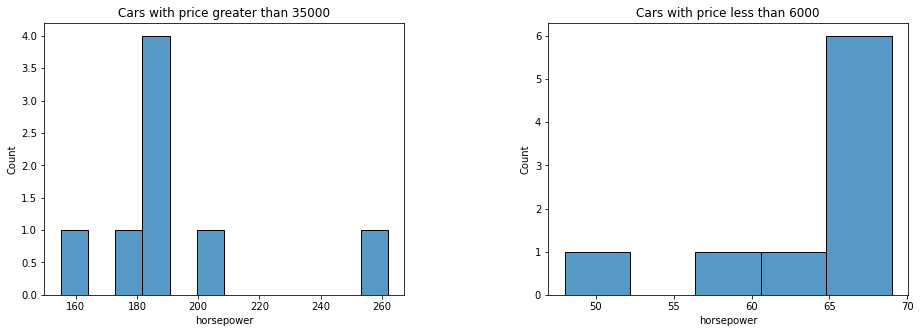

In [33]:
# create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# create the first subplot
sns.histplot(data = df[df['price']>35000], x = df[df['price']>35000]['horsepower'], ax=ax1)
ax1.set_title("Cars with price greater than 35000")

# create the second subplot
sns.histplot(data = df[df['price']<6000], x = df[df['price']<6000]['horsepower'], ax=ax2)
ax2.set_title("Cars with price less than 6000")

# Adjust the space between the subplots
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(wspace=0.4, left=0.1, right=1.1)
plt.show()


Here we see the distribution of horsepower for cheap and expensive cars

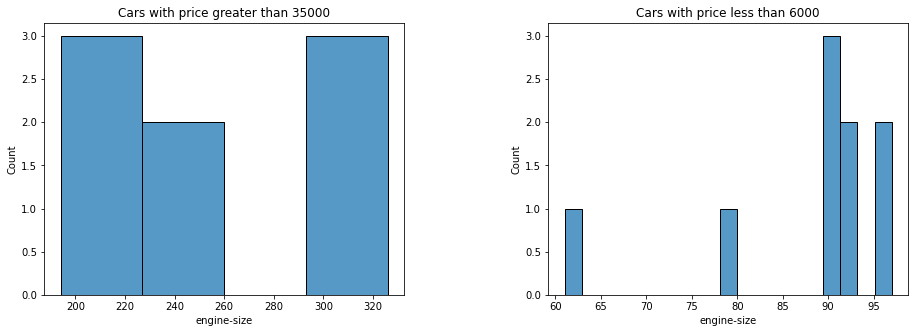

In [34]:
# create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# create the first subplot
sns.histplot(data = df[df['price']>35000], x = df[df['price']>35000]['engine-size'], ax=ax1)
ax1.set_title("Cars with price greater than 35000")

# create the second subplot
sns.histplot(data = df[df['price']<6000], x = df[df['price']<6000]['engine-size'], ax=ax2)
ax2.set_title("Cars with price less than 6000")

# Adjust the space between the subplots
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(wspace=0.4, left=0.1, right=1.1)
plt.show()


Here we see the distribution of engine-size for cheap and expensive cars

#### Ploting features correlation with respect to price

In [35]:
numercial_cols.corr()["price"].sort_values()[:-1]

highway-mpg         -0.704692
city-mpg            -0.686571
peak-rpm            -0.101649
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082310
height               0.135486
normalized-losses    0.203254
bore                 0.543436
wheel-base           0.584642
length               0.690628
width                0.751265
horsepower           0.810533
curb-weight          0.834415
engine-size          0.872335
Name: price, dtype: float64

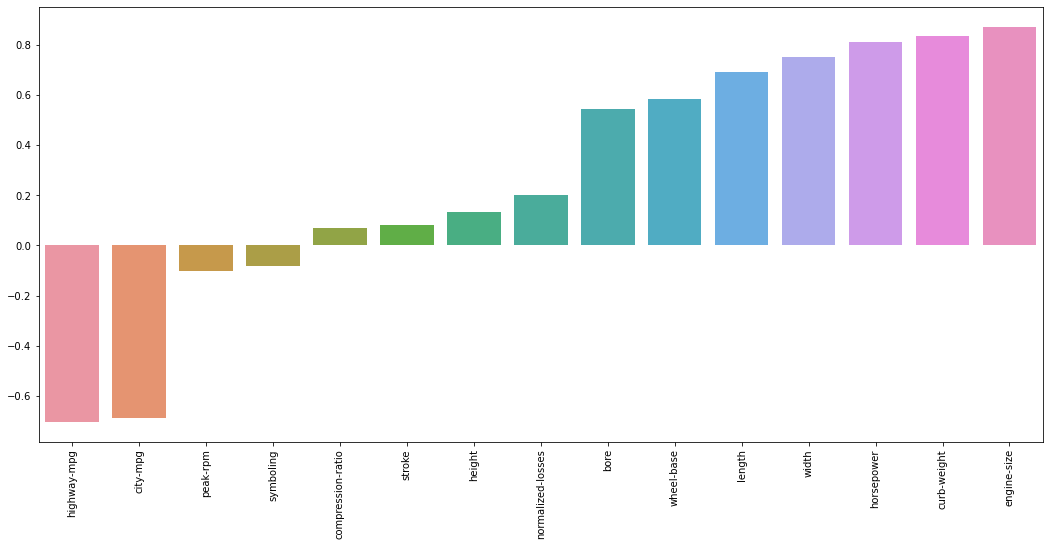

In [36]:
plt.figure(figsize=(18,8))
sns.barplot(x= numercial_cols.corr()["price"].sort_values()[:-1].index,y = numercial_cols.corr()["price"].sort_values()[:-1].values)
plt.xticks(rotation = 90);

Here it is evident that features like length, width, horsepower, curb-weight, engine-size are highly positively correlated with price and features like city-mpg and highway-mpg are highly negatively correlated

In [37]:
corr_df = pd.get_dummies(catagorical_cols.iloc[:,5:]).corr()

corr_df['price'].sort_values()[:-1]

num-of-cylinders_four     -0.691968
drive-wheels_fwd          -0.595979
fuel-system_2bbl          -0.497825
engine-type_ohc           -0.332851
engine-location_front     -0.331062
fuel-system_1bbl          -0.171540
drive-wheels_4wd          -0.076179
num-of-cylinders_three    -0.071860
fuel-system_spdi          -0.060541
fuel-system_spfi          -0.019259
fuel-system_4bbl          -0.016492
num-of-cylinders_two      -0.003364
engine-type_rotor         -0.003364
fuel-system_mfi           -0.002169
engine-type_ohcf           0.019039
engine-type_l              0.045151
fuel-system_idi            0.110326
engine-type_dohc           0.156047
num-of-cylinders_twelve    0.203311
num-of-cylinders_five      0.254019
engine-location_rear       0.331062
engine-type_ohcv           0.394454
num-of-cylinders_eight     0.461834
num-of-cylinders_six       0.486096
fuel-system_mpfi           0.509698
drive-wheels_rwd           0.637522
Name: price, dtype: float64

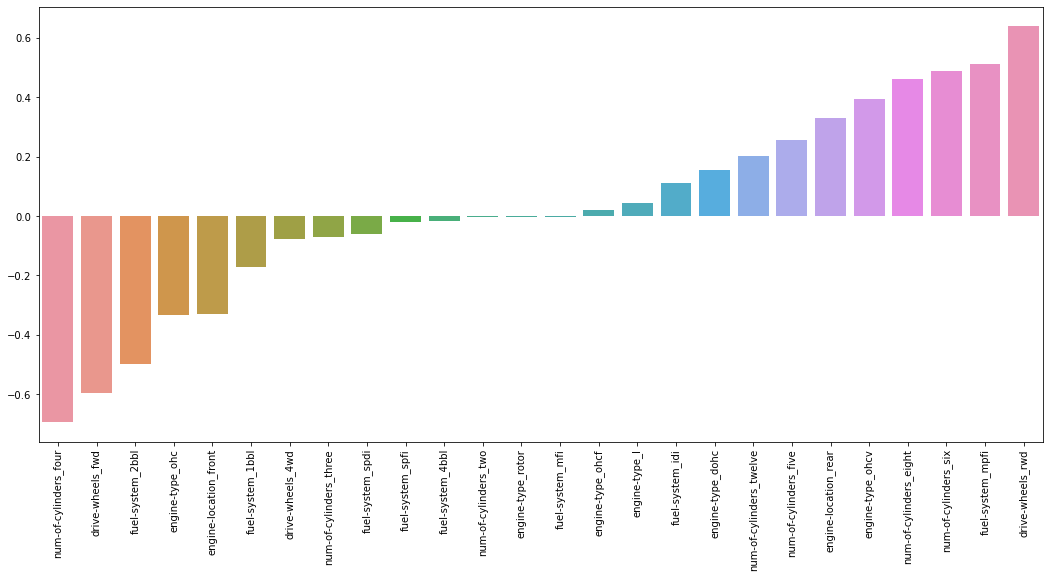

In [38]:
plt.figure(figsize=(18,8))
sns.barplot(x= corr_df['price'].sort_values()[:-1].index,y = corr_df['price'].sort_values()[:-1].values)
plt.xticks(rotation = 90);

Here for categorical features it is evident that cars with fuel-system mpfi and drive-wheels of 'rwd' are highly positively correlated to price.

Also cars with four number of cylinders and drive-wheels of 'fwd' are highly negatively correlated with price

### Finding Correlation of numerical features using heatmap

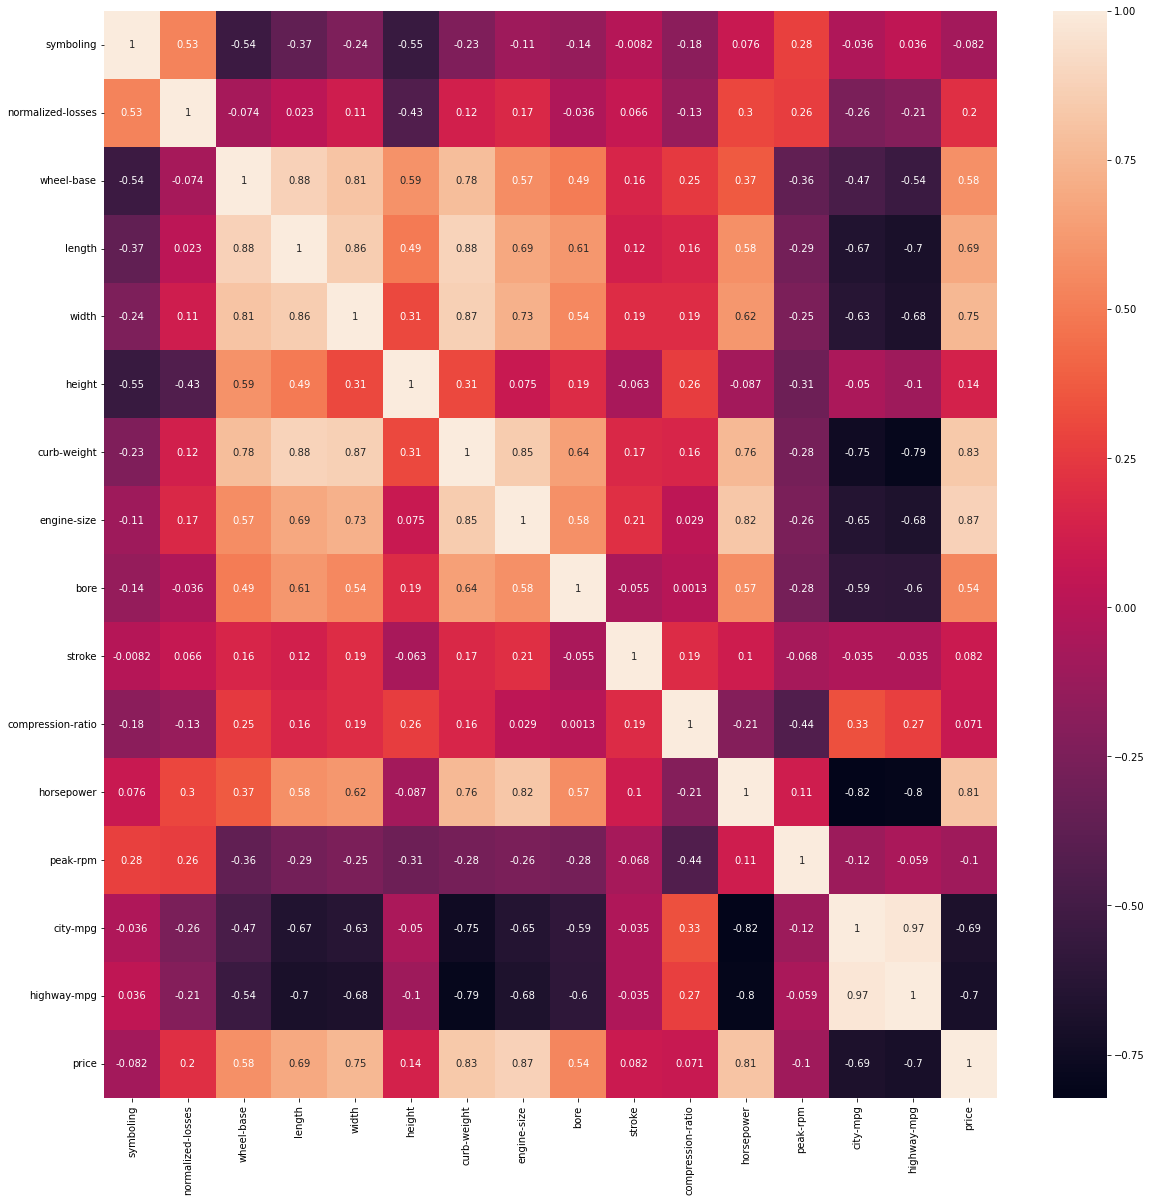

In [39]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data=df.corr(),annot=True)
plt.show()

Here it is evident that there exists lots of features that are highly correlated either positively or negatively to each other. We will need to keep this into account when we are using feature selection or dimensionality reduction

## Dealing With Missing Values

In [40]:
def find_missing(dataframe):
    missing_data_cols = dataframe.columns[df.isnull().sum() > 0]
    null = dataframe.isnull().sum()
    null_df = pd.DataFrame(null,columns=["No_of_null_values"])
    null_df = null_df.loc[missing_data_cols]
    if len(null_df)>0:
        return null_df
    else:
        return "There are no null values!"
    

**We made a reusable function to find missing data in the dataframe**

In [41]:
find_missing(df)

,No_of_null_values
normalized-losses,37
num-of-doors,2
bore,4
stroke,4
horsepower,2
peak-rpm,2


**Since our dataset has outliers so we have filled the numerical null data with median and the categorical null data with mode**

In [42]:
for i in df:
    if df[i].dtypes !='object':
        df[i] = df[i].fillna(df[i].median())
    elif df[i].dtypes =='object':
        df[i] = df[i].fillna(df[i].mode()[0])
        

In [43]:
find_missing(df)

'There are no null values!'

## Dealing with outliers

**Important Things to Note while dealing with outliers:**

There are several ways to find outliers in a dataframe, depending on the type of data and the desired method of detection. Some common techniques include:

**Using the Z-score method:** This involves calculating the Z-score for each data point and identifying any data points with a Z-score greater than a certain threshold (usually 3 or -3). These data points would be considered outliers.

**Using the Interquartile Range (IQR) method:** This involves first calculating the first quartile (Q1), the median (Q2), and the third quartile (Q3) of the data. Then, any data point that is more than 1.5 times the IQR (Q3 - Q1) above Q3 or below Q1 is considered an outlier.

**Using visualization tools:** We can also use visualization tools like box plots or scatter plots to visually identify outliers in data.

**Using robust statistical methods such as the median absolute deviation (MAD) method**

In order to find the outlier we first need to separate the numerical columns in our dataset.

In [44]:
numercial_cols = df.select_dtypes("number")
numercial_cols.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500


### Finding Outliers using Z-Score Index

In [45]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(numercial_cols))
threshold = 3
outliers = np.where(z > threshold)
print(f"Using 'Z-Score Index we found there are {len(outliers[0])} Outliers")

Using 'Z-Score Index we found there are 32 Outliers


Since our dataset is not normaly distributed so it is better to avoid Z-Score index and go for more robust statistical methods such as the median absolute deviation (MAD) method

### Finding Outliers using Mean Absolute Deviation

In [46]:
median = numercial_cols.median()
mad = numercial_cols.mad()
outliers_using_MAD = numercial_cols[(numercial_cols - median).abs() > 3 * mad]

In [47]:
list1 = []
dict1={}
for i in outliers_using_MAD:
    outlier1 = outliers_using_MAD[i].values>0
    for j in outlier1:
        if j == True:
            list1.append(i)
for k in list1:            
    dict1.update({k: list1.count(k)})

pd.DataFrame(dict1,index=['Outliers_Detected_using_MAD']).T


,Outliers_Detected_using_MAD
normalized-losses,8
wheel-base,10
length,4
width,11
height,1
curb-weight,8
engine-size,7
bore,1
stroke,6
compression-ratio,20


### Finding Outliers using box plots

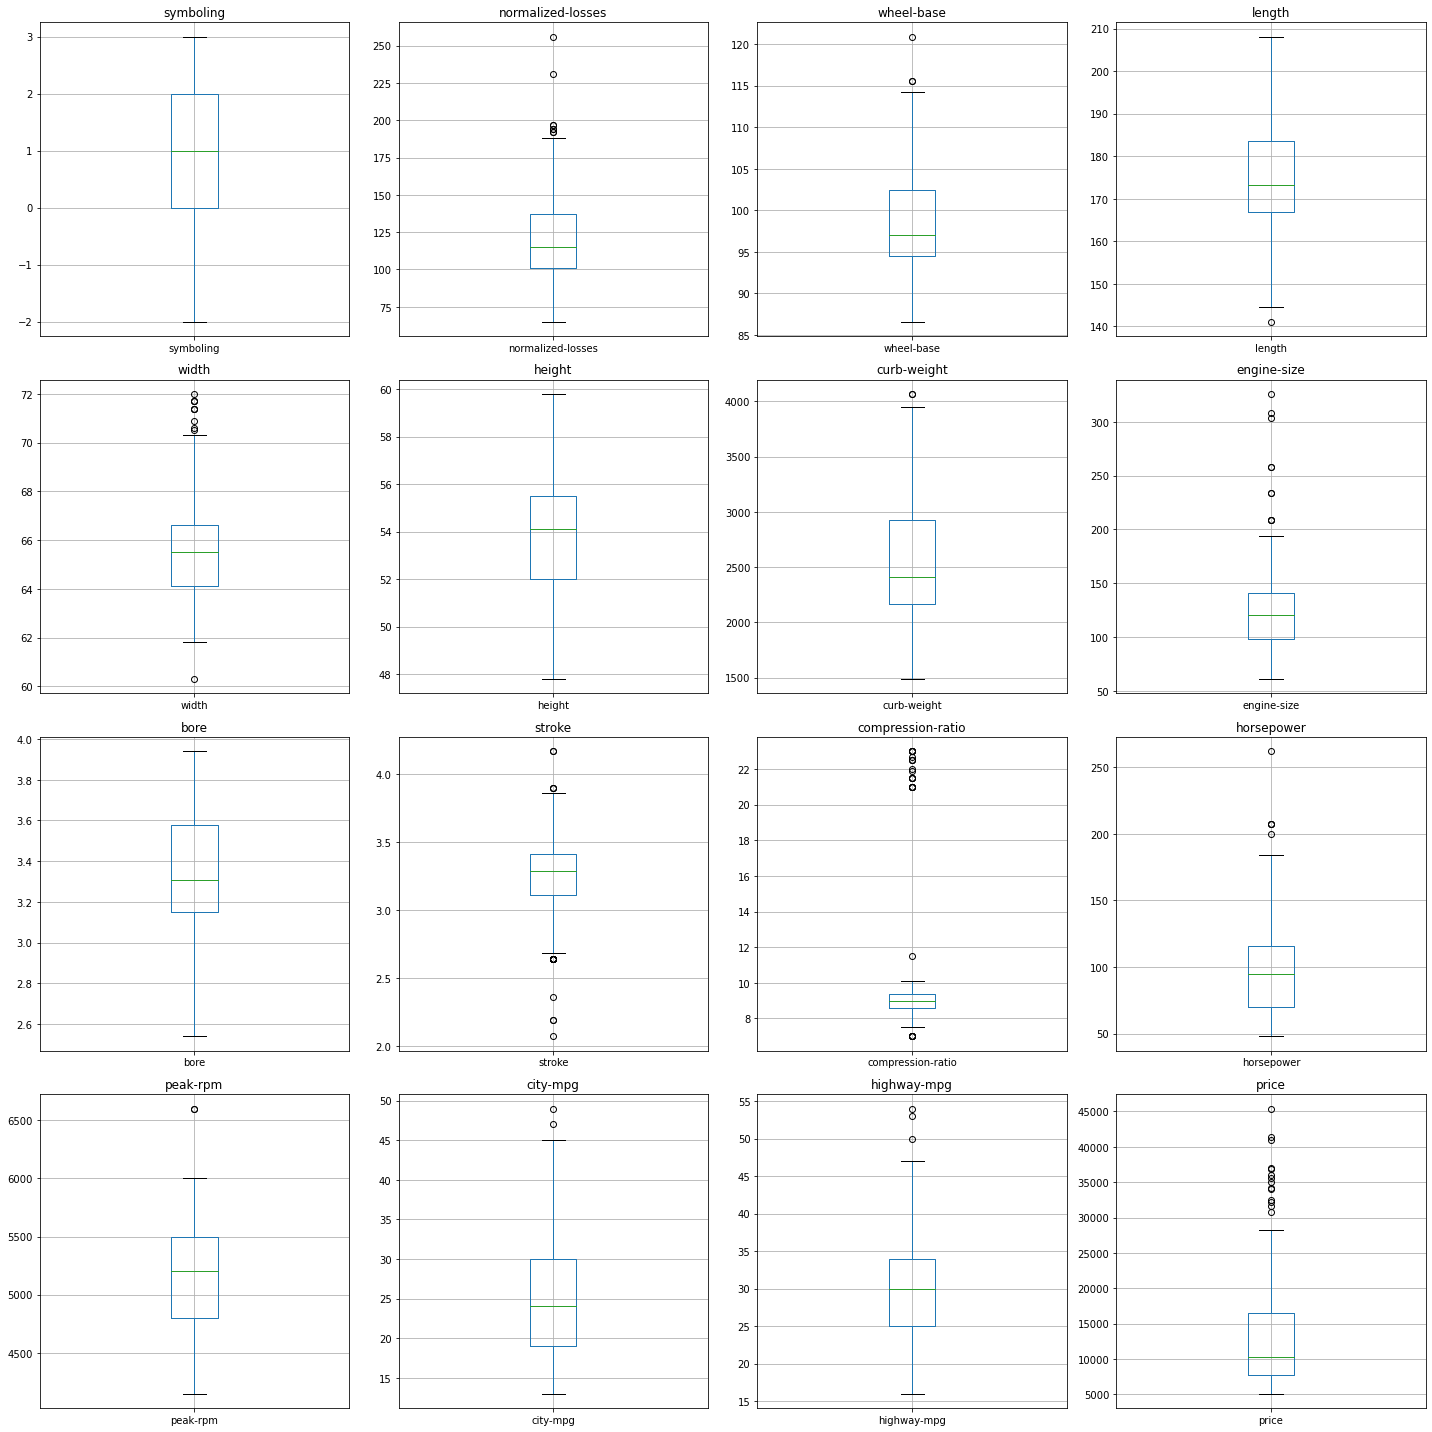

In [48]:
columns = outliers_using_MAD.columns

ncols = 4
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

for i, column in enumerate(columns):
    ax = axes[i // ncols, i % ncols]
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# plt.delaxes(axes[-1,-1])
plt.tight_layout()
plt.show()

### Our Findings: 

Using statistical tools like Mean Absolute Deviation (MAD) and visualiztion with box-plot we have identified a number of outliers.

**However, we have decided to keep the outliers in our data, as we will be using various tree based machine learning models and boosting techniques that unlike distance based algorithms have no effect on outliers.**

## Finding Duplicate Values

In [49]:
df[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


There are no duplicated data in our dataset

## Encoding our data

In [50]:
cat_cols = df.select_dtypes("object")


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [53]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


## Features Selection

Since we have seen that both 'city-mpg' feature and 'highway-mpg' feature are 97% positively correlated to each other, so we can choose to drop either one of these columns. We will remove 'highway-mpg' feature from our dataset.

In [54]:
df.drop('highway-mpg',axis = 1,inplace = True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,13495
1,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,16500


## Model Building

#### Spliting the data

In [55]:
X = df.drop('price',axis =1)

y = df['price']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [58]:
X_train.shape

(160, 24)

In [59]:
X_test.shape

(41, 24)

#### Scaling the Data

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Predicting With Basic Regression Models

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

basic_models =[]
# List of models to try
models = [LinearRegression(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          SVR(),
          RandomForestRegressor(),
         ]

# Hyperparameters to try
param_grid = {'LinearRegression': {},
              'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
              'DecisionTreeRegressor': {'max_depth': [3, 5, 7]},
              'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
              'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
             }


# Dataframe to store results
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2': [], 'Adjusted R2': []}

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")

    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append in a list for future use
    basic_models.append(model)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)
    # Append to DataFrame
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)
    metrics['Adjusted R2'].append(adjusted_r2)
    metrics_df = pd.DataFrame(metrics)
    print(f"{model.__class__.__name__}: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")


LinearRegression: MAE=1963.5522 MSE=6178382.9518 R2=0.8139, Adjusted R2 = 0.7808
KNeighborsRegressor: MAE=1096.8537 MSE=2120140.3550 R2=0.9361, Adjusted R2 = 0.9248
DecisionTreeRegressor: MAE=1261.4338 MSE=2637390.7567 R2=0.9205, Adjusted R2 = 0.9064
SVR: MAE=1871.1582 MSE=9479499.8951 R2=0.7144, Adjusted R2 = 0.6636
RandomForestRegressor: MAE=1133.6772 MSE=2286925.7911 R2=0.9311, Adjusted R2 = 0.9189


In [62]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
KNeighborsRegressor,1096.853659,2.120140e+06,0.936125,0.924770
RandomForestRegressor,1133.677239,2.286926e+06,0.931100,0.918852
DecisionTreeRegressor,1261.433798,2.637391e+06,0.920542,0.906416
SVR,1871.158228,9.479500e+06,0.714406,0.663633
LinearRegression,1963.552175,6.178383e+06,0.813860,0.780769


## Boosting techniques

In [63]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [64]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor


boost_models = []
# List of models to try
models = [GradientBoostingRegressor(),
          LGBMRegressor(),
          AdaBoostRegressor(),
         ]

# Hyperparameters to try
param_grid = {'GradientBoostingRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
              'LGBMRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
              'AdaBoostRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
             }

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")

    # Perform grid search
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append to list for future use
    boost_models.append(model)
    # Make Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)
    # Append to DataFrame
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)
    metrics['Adjusted R2'].append(adjusted_r2)
    metrics_df = pd.DataFrame(metrics)
    print(f"{model.__class__.__name__}: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")

GradientBoostingRegressor: MAE=1596.3309 MSE=4125707.5931 R2=0.8757, Adjusted R2 = 0.8536
LGBMRegressor: MAE=1299.0765 MSE=3055217.8440 R2=0.9080, Adjusted R2 = 0.8916
AdaBoostRegressor: MAE=1676.8161 MSE=4190558.1723 R2=0.8737, Adjusted R2 = 0.8513


In [65]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
KNeighborsRegressor,1096.853659,2.120140e+06,0.936125,0.924770
RandomForestRegressor,1133.677239,2.286926e+06,0.931100,0.918852
DecisionTreeRegressor,1261.433798,2.637391e+06,0.920542,0.906416
LGBMRegressor,1299.076535,3.055218e+06,0.907954,0.891590
GradientBoostingRegressor,1596.330936,4.125708e+06,0.875702,0.853605
AdaBoostRegressor,1676.816055,4.190558e+06,0.873749,0.851304
SVR,1871.158228,9.479500e+06,0.714406,0.663633
LinearRegression,1963.552175,6.178383e+06,0.813860,0.780769


### CatBoosting Techniques

In [66]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor()
# Hyperparameters to try
param_grid =  {'iterations': [100, 200],
               'learning_rate': [0.1, 0.5, 1]}

# Grid Search
gs = GridSearchCV(estimator=CatBoost, param_grid=param_grid, n_jobs =-1)

# Fitting the model
gs.fit(X_train, y_train)
# Setting best parameters
CatBoost.set_params(**best_params)
# Fitting the best parameters
CatBoost.fit(X_train, y_train)
# Making Predictions
y_pred = CatBoost.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)

# Append to DataFrame
metrics['Model'].append('CatBoostRegressor')
metrics['MAE'].append(mae)
metrics['MSE'].append(mse)
metrics['R2'].append(r2)
metrics['Adjusted R2'].append(adjusted_r2)
metrics_df = pd.DataFrame(metrics)
print(f"CatBoostRegressor: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")


0:	learn: 7723.6757301	total: 137ms	remaining: 27.2s
1:	learn: 7212.0120575	total: 139ms	remaining: 13.7s
2:	learn: 6717.4741724	total: 141ms	remaining: 9.24s
3:	learn: 6345.0733190	total: 143ms	remaining: 7s
4:	learn: 6014.7942984	total: 145ms	remaining: 5.64s
5:	learn: 5647.7593141	total: 147ms	remaining: 4.75s
6:	learn: 5386.6465071	total: 149ms	remaining: 4.1s
7:	learn: 5102.1411717	total: 151ms	remaining: 3.61s
8:	learn: 4849.2464972	total: 152ms	remaining: 3.23s
9:	learn: 4607.2599007	total: 154ms	remaining: 2.93s
10:	learn: 4394.2530530	total: 156ms	remaining: 2.69s
11:	learn: 4191.8608892	total: 159ms	remaining: 2.48s
12:	learn: 3965.6590080	total: 161ms	remaining: 2.31s
13:	learn: 3788.5860739	total: 163ms	remaining: 2.16s
14:	learn: 3617.2906473	total: 164ms	remaining: 2.03s
15:	learn: 3481.5682123	total: 166ms	remaining: 1.91s
16:	learn: 3340.7485333	total: 168ms	remaining: 1.81s
17:	learn: 3218.2838215	total: 170ms	remaining: 1.72s
18:	learn: 3113.1156326	total: 172ms	remai

1:	learn: 4241.9014550	total: 4.8ms	remaining: 475ms
2:	learn: 3417.3175158	total: 5.76ms	remaining: 378ms
3:	learn: 2928.3583861	total: 8.42ms	remaining: 413ms
4:	learn: 2462.1644787	total: 10.5ms	remaining: 411ms
5:	learn: 2257.1569219	total: 12.6ms	remaining: 408ms
6:	learn: 2003.7871374	total: 14.5ms	remaining: 401ms
7:	learn: 1808.4947710	total: 16.6ms	remaining: 399ms
8:	learn: 1705.6974073	total: 18.6ms	remaining: 395ms
9:	learn: 1574.5488795	total: 21ms	remaining: 400ms
10:	learn: 1450.1182846	total: 23ms	remaining: 395ms
11:	learn: 1379.4652941	total: 25.1ms	remaining: 393ms
12:	learn: 1302.0690849	total: 27.1ms	remaining: 390ms
13:	learn: 1227.1873347	total: 29.2ms	remaining: 388ms
14:	learn: 1136.2748039	total: 31.4ms	remaining: 387ms
15:	learn: 1100.6388127	total: 34.3ms	remaining: 395ms
16:	learn: 1045.1727682	total: 37.7ms	remaining: 406ms
17:	learn: 1008.1569013	total: 39.8ms	remaining: 402ms
18:	learn: 960.1967185	total: 41.7ms	remaining: 397ms
19:	learn: 923.3804482	to

167:	learn: 241.2536591	total: 328ms	remaining: 62.5ms
168:	learn: 241.0817416	total: 330ms	remaining: 60.5ms
169:	learn: 241.0523747	total: 332ms	remaining: 58.6ms
170:	learn: 241.0399120	total: 334ms	remaining: 56.6ms
171:	learn: 240.9489394	total: 336ms	remaining: 54.7ms
172:	learn: 240.9431382	total: 338ms	remaining: 52.7ms
173:	learn: 240.8417546	total: 339ms	remaining: 50.7ms
174:	learn: 240.7369718	total: 342ms	remaining: 48.9ms
175:	learn: 240.6197546	total: 344ms	remaining: 47ms
176:	learn: 240.5480654	total: 346ms	remaining: 45ms
177:	learn: 240.5062287	total: 348ms	remaining: 43ms
178:	learn: 240.4305571	total: 350ms	remaining: 41.1ms
179:	learn: 240.3892190	total: 352ms	remaining: 39.1ms
180:	learn: 240.2837434	total: 354ms	remaining: 37.2ms
181:	learn: 240.2657364	total: 357ms	remaining: 35.3ms
182:	learn: 240.1766309	total: 359ms	remaining: 33.3ms
183:	learn: 240.1731227	total: 361ms	remaining: 31.4ms
184:	learn: 240.1142890	total: 363ms	remaining: 29.4ms
185:	learn: 240.

In [67]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
KNeighborsRegressor,1096.853659,2.120140e+06,0.936125,0.924770
RandomForestRegressor,1133.677239,2.286926e+06,0.931100,0.918852
CatBoostRegressor,1178.401585,2.040889e+06,0.938513,0.927582
DecisionTreeRegressor,1261.433798,2.637391e+06,0.920542,0.906416
LGBMRegressor,1299.076535,3.055218e+06,0.907954,0.891590
GradientBoostingRegressor,1596.330936,4.125708e+06,0.875702,0.853605
AdaBoostRegressor,1676.816055,4.190558e+06,0.873749,0.851304
SVR,1871.158228,9.479500e+06,0.714406,0.663633
LinearRegression,1963.552175,6.178383e+06,0.813860,0.780769


### XGBoosting Techniques

In [68]:
from xgboost import XGBRegressor

# Initializing the model
XGB = XGBRegressor()

# Hyperparameters to try
param_grid =  {'n_estimators': [100, 200],
               'learning_rate': [0.1, 0.5, 1]}

# Grid Search
gs = GridSearchCV(estimator=XGB, param_grid=param_grid, n_jobs =-1)
gs.fit(X_train, y_train)
# Setting best parameters
XGB.set_params(**best_params)
# Fitting the best paramenters
XGB.fit(X_train, y_train)
# Making Predictions
y_pred = XGB.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)

# Appending to new DataFrame
metrics['Model'].append('XGBoost')
metrics['MAE'].append(mae)
metrics['MSE'].append(mse)
metrics['R2'].append(r2)
metrics['Adjusted R2'].append(adjusted_r2)
metrics_df = pd.DataFrame(metrics)
print(f"XGBoost: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")


XGBoost: MAE=1334.1786 MSE=2894926.5433 R2=0.9128, Adjusted R2 = 0.8973


In [69]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
KNeighborsRegressor,1096.853659,2.120140e+06,0.936125,0.924770
RandomForestRegressor,1133.677239,2.286926e+06,0.931100,0.918852
CatBoostRegressor,1178.401585,2.040889e+06,0.938513,0.927582
DecisionTreeRegressor,1261.433798,2.637391e+06,0.920542,0.906416
LGBMRegressor,1299.076535,3.055218e+06,0.907954,0.891590
XGBoost,1334.178556,2.894927e+06,0.912783,0.897278
GradientBoostingRegressor,1596.330936,4.125708e+06,0.875702,0.853605
AdaBoostRegressor,1676.816055,4.190558e+06,0.873749,0.851304
SVR,1871.158228,9.479500e+06,0.714406,0.663633


## Model Comparison Report

In our dataset we have fitted 10 regression algorithm models that helped us predict the prices of autos based on various features of the autos. 

In the above dataframe we seeing that KNeighborsRegressor Algorithm and Tree based regression algorithms are giving us great results. We have applied several boosted trees methods like XGBoost, AdaBoost, LGBMRegresssor etc. These are also showing quite good prediction. 

However as expected since our dataset is having outliers so the distance based algorithms like SVR and Linear Regression are not giving us good predictions. 

In order for us to clearly see which models are performing the best, we will be testing our trained models again by fiting the model with a random sample from our dataset.

### We will test our trained model to a random sample data  from our dataset

In [70]:
test_df = df.sample(1)
X1 = test_df.drop('price',axis =1)
y1 = test_df['price']
test_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
157,0,91.0,19,1,0,0,2,1,0,95.7,166.3,64.4,52.8,2122,2,2,98,1,3.19,3.03,9.0,70.0,4800.0,28,8358


#### Scaling our sample data

In [71]:
from sklearn.preprocessing import StandardScaler

# Scale the sample data
sample_scaled = scaler.transform(X1)
sample_scaled

array([[-0.70278193, -1.02052588,  1.08506433,  0.33333333, -0.47050403,
        -0.85972695, -0.70732776, -0.64044476, -0.1382327 , -0.52567667,
        -0.7048504 , -0.78083698, -0.38529251, -0.87948774, -0.05555556,
        -0.15171652, -0.72689981, -1.25213221, -0.56514246, -0.78148915,
        -0.28564608, -0.92793805, -0.73828047,  0.45629691]])

In [72]:
basic_models

[LinearRegression(),
 KNeighborsRegressor(n_neighbors=3),
 DecisionTreeRegressor(max_depth=7),
 SVR(C=10, kernel='linear'),
 RandomForestRegressor(max_depth=7)]

In [73]:
sample_performance_report = {'Model': [], 'Predicted_Price': [], 'Actual_Price': []}

for models in basic_models:
    model_name = str(models).split("(")[0]
    model_name = models
    model_name.fit(X_train,y_train)
    model_pred = model_name.predict(sample_scaled)
    sample_performance_report['Model'].append(models.__class__.__name__)
    sample_performance_report['Predicted_Price'].append(round(model_pred[0],2))
    sample_performance_report['Actual_Price'].append(y1.values[0])
    report_df = pd.DataFrame(sample_performance_report)
    print(f"{str(model_name).split('(')[0]} is estimating Sample Auto Price to be {round(model_pred[0],2)}, actual price is {y1.values[0]}")

LinearRegression is estimating Sample Auto Price to be 6731.28, actual price is 8358
KNeighborsRegressor is estimating Sample Auto Price to be 8271.33, actual price is 8358
DecisionTreeRegressor is estimating Sample Auto Price to be 8545.29, actual price is 8358
SVR is estimating Sample Auto Price to be 7960.17, actual price is 8358
RandomForestRegressor is estimating Sample Auto Price to be 8289.93, actual price is 8358


In [74]:
report_df

,Model,Predicted_Price,Actual_Price
0,LinearRegression,6731.28,8358
1,KNeighborsRegressor,8271.33,8358
2,DecisionTreeRegressor,8545.29,8358
3,SVR,7960.17,8358
4,RandomForestRegressor,8289.93,8358


In [75]:
boost_models

[GradientBoostingRegressor(learning_rate=0.5, n_estimators=200),
 LGBMRegressor(n_estimators=200),
 AdaBoostRegressor(learning_rate=0.5, n_estimators=200)]

In [76]:
for models in boost_models:
    model_name = str(models).split("(")[0]
    model_name = models
    models.fit(X_train,y_train)
    model_pred = models.predict(sample_scaled)
    sample_performance_report['Model'].append(models.__class__.__name__)
    sample_performance_report['Predicted_Price'].append(round(model_pred[0],2))
    sample_performance_report['Actual_Price'].append(y1.values[0])
    report_df = pd.DataFrame(sample_performance_report)
    print(f"{str(model_name).split('(')[0]} is estimating Sample Auto Price to be {round(model_pred[0],2)}, actual price is {y1.values[0]}")

GradientBoostingRegressor is estimating Sample Auto Price to be 8356.96, actual price is 8358
LGBMRegressor is estimating Sample Auto Price to be 8110.66, actual price is 8358
AdaBoostRegressor is estimating Sample Auto Price to be 8352.0, actual price is 8358


In [77]:
report_df

,Model,Predicted_Price,Actual_Price
0,LinearRegression,6731.28,8358
1,KNeighborsRegressor,8271.33,8358
2,DecisionTreeRegressor,8545.29,8358
3,SVR,7960.17,8358
4,RandomForestRegressor,8289.93,8358
5,GradientBoostingRegressor,8356.96,8358
6,LGBMRegressor,8110.66,8358
7,AdaBoostRegressor,8352.00,8358


In [78]:
Catboost_predict = CatBoost.predict(sample_scaled)
sample_performance_report['Model'].append('CatboostRegressor')
sample_performance_report['Predicted_Price'].append(Catboost_predict[0])
sample_performance_report['Actual_Price'].append(y1.values[0])
report_df = pd.DataFrame(sample_performance_report)
report_df

,Model,Predicted_Price,Actual_Price
0,LinearRegression,6731.280000,8358
1,KNeighborsRegressor,8271.330000,8358
2,DecisionTreeRegressor,8545.290000,8358
3,SVR,7960.170000,8358
4,RandomForestRegressor,8289.930000,8358
5,GradientBoostingRegressor,8356.960000,8358
6,LGBMRegressor,8110.660000,8358
7,AdaBoostRegressor,8352.000000,8358
8,CatboostRegressor,8376.658931,8358


In [79]:
XGB_predict = XGB.predict(sample_scaled)
sample_performance_report['Model'].append('XGBRegressor')
sample_performance_report['Predicted_Price'].append(XGB_predict[0])
sample_performance_report['Actual_Price'].append(y1.values[0])
report_df = pd.DataFrame(sample_performance_report)
report_df

,Model,Predicted_Price,Actual_Price
0,LinearRegression,6731.280000,8358
1,KNeighborsRegressor,8271.330000,8358
2,DecisionTreeRegressor,8545.290000,8358
3,SVR,7960.170000,8358
4,RandomForestRegressor,8289.930000,8358
5,GradientBoostingRegressor,8356.960000,8358
6,LGBMRegressor,8110.660000,8358
7,AdaBoostRegressor,8352.000000,8358
8,CatboostRegressor,8376.658931,8358
9,XGBRegressor,8358.003906,8358


In [80]:
report_df['(Actual_Price - Predicted_Price)'] = report_df["Actual_Price"] - report_df["Predicted_Price"]
report_df

,Model,Predicted_Price,Actual_Price,(Actual_Price - Predicted_Price)
0,LinearRegression,6731.280000,8358,1626.720000
1,KNeighborsRegressor,8271.330000,8358,86.670000
2,DecisionTreeRegressor,8545.290000,8358,-187.290000
3,SVR,7960.170000,8358,397.830000
4,RandomForestRegressor,8289.930000,8358,68.070000
5,GradientBoostingRegressor,8356.960000,8358,1.040000
6,LGBMRegressor,8110.660000,8358,247.340000
7,AdaBoostRegressor,8352.000000,8358,6.000000
8,CatboostRegressor,8376.658931,8358,-18.658931
9,XGBRegressor,8358.003906,8358,-0.003906


### Our Best Model for Production:

Our best model for production is **KNeighborsRegressor**. We have selected this model as it is not only giving us the best predicted price but also it is less prone to overfitting

### Business Strategies:

We will find our the most important features that some of our models used to predict the price, we can report it to management so that they can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

In [81]:
# Get feature importances
importances = CatBoost.feature_importances_

# Get feature names
feature_names = df.columns

# Get indices of feature importances in decreasing order
indices = np.argsort(importances)[::-1]

# Create a dataframe with feature importances and feature names
df_feature_importance = pd.DataFrame({'CatBoost_feature_importance': importances[indices]}, index=feature_names[indices])

# Print the dataframe
df_feature_importance

,CatBoost_feature_importance
city-mpg,41.740351
bore,14.746204
curb-weight,13.456380
engine-size,10.460097
fuel-system,3.269747
horsepower,2.007185
drive-wheels,1.720959
width,1.611673
length,1.595663
make,1.589269


In [82]:
# Get feature importances
importances = XGB.feature_importances_

# Get feature names
feature_names = df.columns

# Get indices of feature importances in decreasing order
indices = np.argsort(importances)[::-1]

# Create a dataframe with feature importances and feature names
df_feature_importance = pd.DataFrame({'XGB_feature_importance': importances[indices]}, index=feature_names[indices])

# Print the dataframe
df_feature_importance

,XGB_feature_importance
engine-size,7.663361e-01
horsepower,4.667401e-02
curb-weight,3.492785e-02
wheel-base,2.033154e-02
fuel-system,1.743709e-02
bore,1.545937e-02
drive-wheels,1.419799e-02
make,1.346801e-02
length,1.305173e-02
stroke,1.127555e-02


## Our Final Conclusion About PRCP-1017-AutoPricePred Dataset

Here we have seen that the features like 'engine-size', 'horsepower','curb-weight','wheel-base','city-mpg' etc are very much important in deciding the price level. So here are our suggestions to management from the findings:

1) The engine-size needs to be bigger if we want to make a more expensive car and price that accordingly.

2) If we want to launch a budget car then we may reduce the horsepower and reduce the price.

3) The curb-weight and wheel-base may be reduced for a budget friendly car.

4) For a budget car, the car need to go at a higher miles per gallon(mpg).